<a href="https://colab.research.google.com/github/TanZz9/LearnPyTorch/blob/main/3_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import v2

import matplotlib.pyplot as plt

torchvision.__version__

'0.16.0+cu121'

# Dataset - FashionMnist

In [ ]:
train_set = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=v2.ToTensor(), # how do we transform the data
    target_transform=None # how do we transform the labels
)

test_set = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=v2.ToTensor(),
    target_transform=None
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


100%|██████████| 26421880/26421880 [00:02<00:00, 11964133.20it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202429.06it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3762674.29it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17904043.94it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_set), len(test_set)

(60000, 10000)

In [ ]:
image, label = train_set[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_set.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

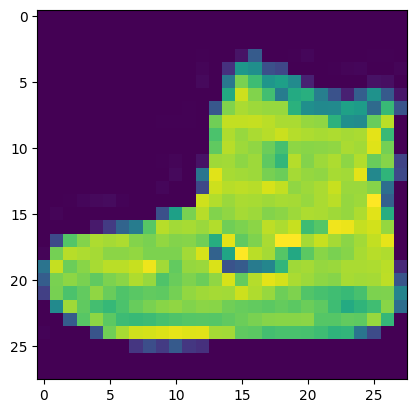

In [ ]:
plt.imshow(image.squeeze())

In [ ]:
from PIL import Image
img = v2.ToPILImage()(image)
img

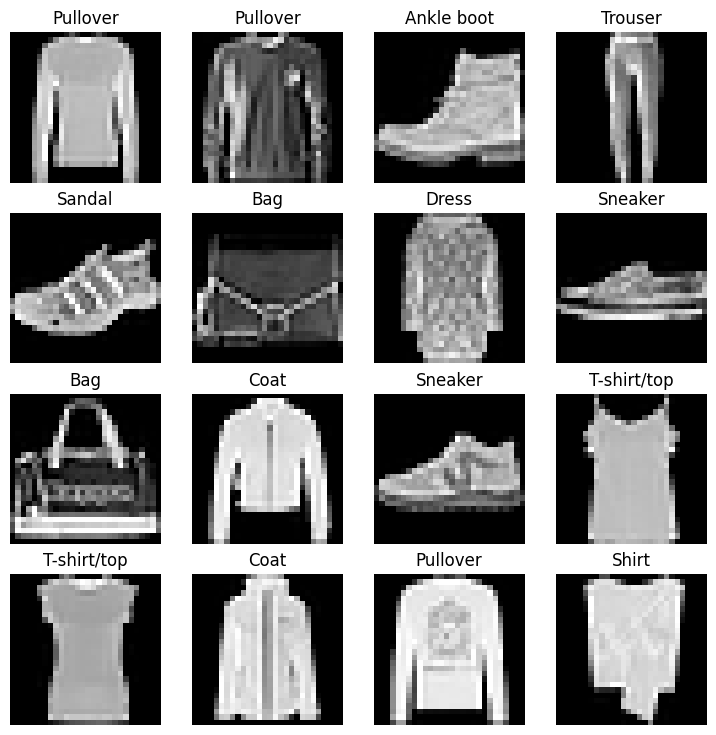

In [ ]:
# Plot more images
torch.manual_seed(1)
fig = plt.figure(figsize=(9, 9))
for i in range(1, 17):
  random_idx = torch.randint(0, len(train_set), size=[1]).item()
  img, label = train_set[random_idx]
  fig.add_subplot(4, 4, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
# dataloader turns a dataset into a Python iterable
from torch.utils.data import DataLoader

Batch_size = 32
train_dataloader = DataLoader(
    batch_size=Batch_size,
    dataset=train_set,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_set,
    batch_size=Batch_size,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78395416e8f0>,
 <torch.utils.data.dataloader.DataLoader at 0x78395416fd30>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"The length of DataLoader: Train: {len(train_dataloader)} | Test: {len(test_dataloader)}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78395416e8f0>, <torch.utils.data.dataloader.DataLoader object at 0x78395416fd30>)
The length of DataLoader: Train: 1875 | Test: 313


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

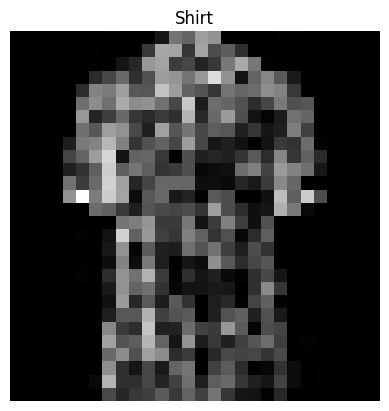

In [ ]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

# A baseline model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)

print(output.shape)

torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               in_features,
               out_features,
               hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=out_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model0 = FashionMNISTModelV0(in_features=28*28,
                             out_features=len(class_names),
                             hidden_units=10).to(device)

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy = torch.randn([1, 1, 28, 28]).to(device)
model0(dummy).shape

torch.Size([1, 10])

In [ ]:
def accuracy_fn(y_preds, y_true):
  sum = torch.eq(y_preds, y_true).sum().item()
  return sum

In [ ]:
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
   print("python script already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_funcitons.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Loss Function & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model0.parameters(),
    lr=0.1
)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  # return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start_time, end_time, device)

Train time on cuda: 0.000 seconds


In [ ]:
# 示例测试代码
y_preds_example = torch.tensor([[0.8, 0.2], [0.3, 0.7], [0.6, 0.4]])
y_true_example = torch.tensor([0, 1, 0])

# 使用 torch.argmax 获取预测类别
predicted_labels = torch.argmax(y_preds_example, dim=1)
accuracy_fn(predicted_labels, y_true_example)

3

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. If necessary, time it all

In [ ]:
from tqdm.auto import tqdm

torch.cuda.manual_seed(100)
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  # Train
  train_loss = 0
  train_acc = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)
    model0.train()
    # 1. Forward pass
    y_preds = model0(X)
    train_acc += accuracy_fn(y_preds.argmax(dim=1), y)
    # 2. Calculate the loss
    loss = loss_fn(y_preds, y)
    train_loss += loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer.step()
    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader.dataset)
  train_acc /= len(train_dataloader.dataset)

  # Testing
  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      # 1. Forward pass
      test_preds = model0(X_test)
      # 2. Loss
      test_loss += loss_fn(test_preds, y_test).item()
      # 3. Accuracy
      acc = accuracy_fn(y_true=y_test, y_preds=test_preds.argmax(dim=1))
      # print(acc)
      test_acc += acc
  test_loss /= len(test_dataloader.dataset)
  test_acc /= len(test_dataloader.dataset)

  print(f"\nTrain loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
print_train_time(train_time_start, timer(), device)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.0186 | Train Acc: 0.7873 | Test Loss: 0.0167 | Test Acc: 0.8164
Epoch: 1
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.0150 | Train Acc: 0.8325 | Test Loss: 0.0153 | Test Acc: 0.8261
Epoch: 2
-----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.0142 | Train Acc: 0.8394 | Test Loss: 0.0146 | Test Acc: 0.8372
Train time on cuda: 34.107 seconds


In [ ]:
def accuracy_fn1(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.cpu()
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_preds = model(X)
      loss += loss_fn(y_preds, y).item()
      acc += accuracy_fn(y_pred=y_preds.argmax(dim=1), y_true=y)

  loss /= len(data_loader)
  acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss,
          "model_acc": acc}

model0_results = eval_model(model0,
                            test_dataloader,
                            loss_fn,
                            accuracy_fn1)
model0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46705280529995696,
 'model_acc': 83.72603833865814}

# A non-linear model

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               in_features: int,
               out_features: int,
               hidden_units: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(100)
model1 = FashionMNISTModelV1(in_features=28*28,
                             out_features=10,
                             hidden_units=10).to(device)
model1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model1.parameters(),
    lr=0.1
)

## Train step and Test step


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  # Train
  train_loss = 0
  train_acc = 0
  model.train()

  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)

    # 1. Forward pass
    y_preds = model(X)
    train_acc += accuracy_fn(y_preds.argmax(dim=1), y)

    # 2. Calculate the loss
    loss = loss_fn(y_preds, y)
    train_loss += loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(dataloader.dataset)} samples.")

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.5f}%")

In [ ]:
def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  model.eval()

  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)

      y_preds = model(X)

      test_loss += loss_fn(y_preds, y).item()
      test_acc += accuracy_fn(y_preds.argmax(dim=1), y)

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}%")


In [ ]:
torch.manual_seed(100)

train_time_start = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model1,
            train_dataloader,
            loss_fn,
            optimizer,
            accuracy_fn1,
            device)
  test_step(model1,
            test_dataloader,
            loss_fn,
            accuracy_fn1,
            device)
train_time_end = timer()
print_train_time(train_time_start,
                 train_time_end,
                 device)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 1.56083 | Train Acc: 41.34333%
Test Loss: 1.31207 | Test Acc: 51.14816%
Epoch: 1
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 1.21929 | Train Acc: 53.69667%
Test Loss: 1.22186 | Test Acc: 53.83387%
Epoch: 2
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 1.19642 | Train Acc: 54.34667%
Test Loss: 1.20711 | Test Acc: 54.25319%
Epoch: 3
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 1.18329 | Train Acc: 54.54333%
Test Loss: 1.19678 | Test

In [ ]:
eval_model(model1,
           test_dataloader,
           loss_fn,
           accuracy_fn1)

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.0028672469690585,
 'model_acc': 62.509984025559106}

# Model2: Building a Convolutional Neural Network(CNN)

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x



In [ ]:
image.shape

torch.Size([1, 1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              output_shape=len(class_names),
                              hidden_units=10).to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

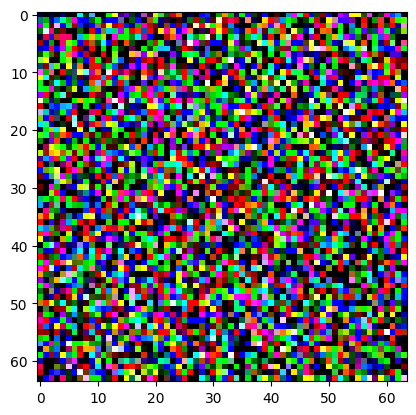

In [ ]:
torch.manual_seed(1)
images = torch.randn(size=(32, 3, 64, 64),
                     )
test_img = images[0].permute((1, 2, 0))
plt.imshow(test_img)

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
test_img = images[1].unsqueeze(dim=0)
conv_output = conv_layer(test_img)
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
maxp_output = maxpool_layer(conv_output)
maxp_output.shape

torch.Size([1, 10, 31, 31])

In [ ]:
image = torch.randn(size=(1, 1, 28, 28))
model_2(image.to(device)).shape

torch.Size([1, 10])

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_2.parameters(),
    lr=0.1
)

In [ ]:
epochs = 3
torch.cuda.manual_seed(42)
torch.manual_seed(42)
train_start_time = timer()

def acf(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=acf,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=acf,
            device=device)

train_end_time = timer()
print_train_time(start=train_start_time,
                 end=train_end_time,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.59647 | Train Acc: 78.28667%
Test Loss: 0.39369 | Test Acc: 85.98243%
Epoch: 1
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.36687 | Train Acc: 86.75000%
Test Loss: 0.37000 | Test Acc: 86.22204%
Epoch: 2
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.
Train Loss: 0.32890 | Train Acc: 88.06500%
Test Loss: 0.33530 | Test Acc: 87.91933%
Train time on cuda: 51.617 seconds


In [ ]:
model1_results = eval_model(model1, test_dataloader, loss_fn, acf)
model2_results = eval_model(model_2, test_dataloader, loss_fn, acf)
model1_results, model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 1.0028672469690585,
  'model_acc': 62.509984025559106},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.3353040730134367,
  'model_acc': 87.91932907348243})

# Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame(
    [model0_results,
    model1_results,
    model2_results]
)

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.467053,83.726038
1,FashionMNISTModelV1,1.002867,62.509984
2,FashionMNISTModelV2,0.335304,87.919329


Text(0, 0.5, 'model')

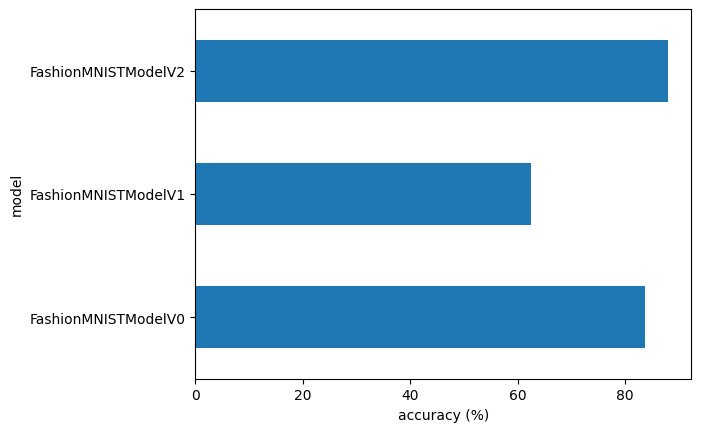

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in tqdm(data):
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)



In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_set), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

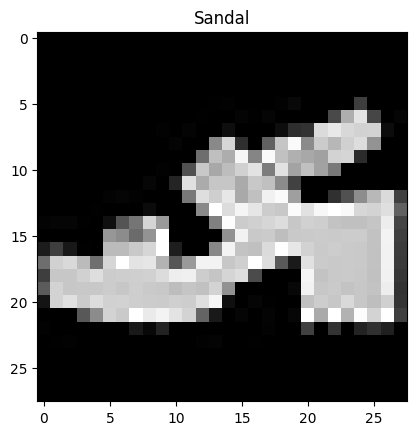

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model_2, test_samples)
pred_probs[:2]

  0%|          | 0/9 [00:00<?, ?it/s]

tensor([[1.1271e-05, 9.7948e-07, 5.2847e-06, 4.6636e-05, 1.4236e-05, 3.0094e-02,
         2.5338e-06, 1.2330e-02, 5.5737e-03, 9.5192e-01],
        [2.0165e-05, 3.9073e-07, 2.0045e-06, 1.3914e-06, 1.1066e-05, 2.2554e-03,
         8.0673e-07, 9.7899e-01, 6.8551e-04, 1.8035e-02]])

In [ ]:
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

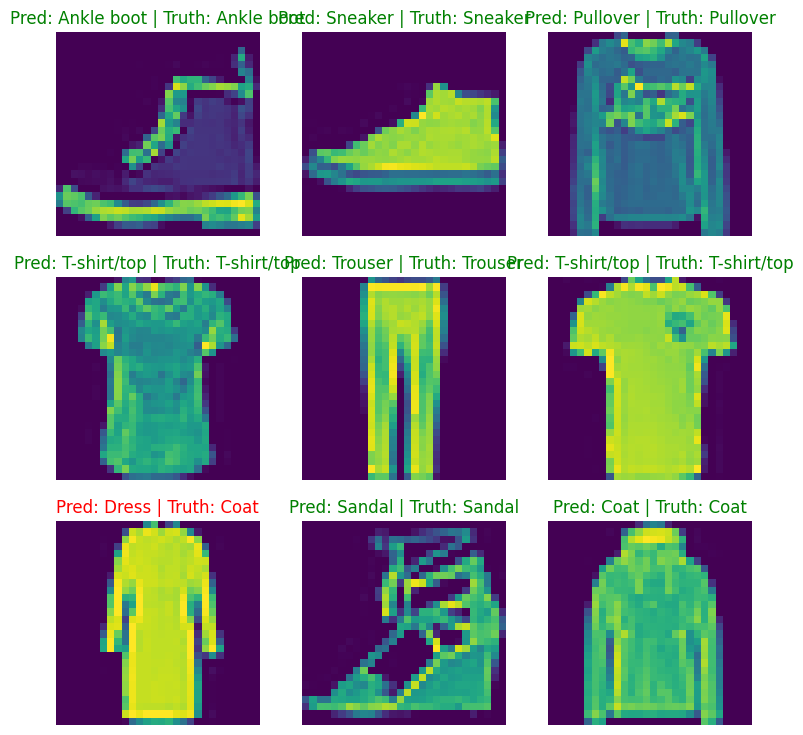

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(test_samples[i].squeeze())

  pred_label = class_names[pred_labels[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, c="g")
  else:
    plt.title(title_text, c="r")

  plt.axis(False)